<a href="https://colab.research.google.com/github/GregoryDzej/Big-Data-Python-task/blob/secondbranch/Big_data_Cardio_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

uploaded = files.upload()



for fn in uploaded.keys():

  print('User uploaded file "{name}" with length {length} bytes'.format(

name=fn, length=len(uploaded[fn])))



import pandas as pd

import numpy as np

from scipy import stats

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPRegressor

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

import os



# Importing dataset



main_data = pd.read_csv (r'/content/cardio_train.csv', delimiter=';', encoding = "ISO-8859-1")



main_data

Saving cardio_train.csv to cardio_train.csv
User uploaded file "cardio_train.csv" with length 2941524 bytes


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


After loading the "cardio.csv" data, it seems that the potential candidate to be a dependent variables is a dichotomus variable labeled as "cardio". 
It has values 0 and 1, where 0 represents not having a cardiovasculer disease by a patient and 1 stands for having the disease.
First step for before conducting the analysis is to describe the data, find missing values and observiations that seems to be inappropriate for the  analysis, thus potentially to ommit. Data set contains 13 variables listed below: 

1.   id - id of the patient
2.   age - age of a patient in *days*
3. gender - gender of a patient, 1 - women, 2 - men
4. height - heigh of the patient in cm
5. weight - weight of a patient in kg
6. ap_hi -  systolic blood pressure
7. ap_lo - diastolic blood preasure
8. cholesterol - cholesterol levels - 1: normal, 2: above normal, 3: well above normal
9. gluc - glucose levels - 1: normal, 2: above normal, 3: well above normal
10. smoke - smoking status, no - 0 ,  yes - 1
11. alco - alkohol consumption, no - 0, yes - 1
12. active - active lifestyle, no - 0, yes - 1
13. cardio - cardiovascular disease, no - 0, yes - 1

Variables: **"age", "height", "weight", "ap_hi", "ap_lo"**  are a quantitative - continous variables, whereas the variables like: **"gender", "smoke", "alco", "active"** - are representing dichotomus variables and **"cholesterol", "gluc"** representing ordered categorical variables with three levels.   

In [3]:
main_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


Once the data was displayed, it can be noticed that an "age" variable is expresed in days, therfore to obtains standard outcomes it is requred to convert it into the years. Also the "ap_hi" and Once the data was displayed, it can be noticed that an "age" variable is expresed in days, therfore to obtains standard outcomes it is requred to convert it into the years. Also the "ap_hi" and "ap_lo" varibles are having negative values at some observations, thus it is necessary to ommit them, as it is impossible for patient to have negative or zero blood preasure. In other words the variables reflecting the blood preasure of all patients need to be adjusted to biologically available levels either systolic or diastolic.   

In [4]:
#checking the number of NA's in the dataset 
main_data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

After describing the data, it **can be noticed that there is 0 NA's within the data set** once the "isna" function been activated. 
 

In [5]:
#frequency of dichotomus variable
main_data[["gender","cholesterol","gluc","smoke","alco","active","cardio" ]].apply(lambda x: x.value_counts()).T.stack()

gender       1    45530.0
             2    24470.0
cholesterol  1    52385.0
             2     9549.0
             3     8066.0
gluc         1    59479.0
             2     5190.0
             3     5331.0
smoke        0    63831.0
             1     6169.0
alco         0    66236.0
             1     3764.0
active       0    13739.0
             1    56261.0
cardio       0    35021.0
             1    34979.0
dtype: float64

Above is the frequency of categorical data with respect to each level of the variable. 

Below are the histograms of all existing continous variables in the dataset, beside the **"id"** which represent an index of each patients and does not have any representation. Also **"ap_hi"** and **"ap_lo"** does not apear on the figure beneath, as they need to be transformed. 

Describtion of the all of the data will be provided after necessary recoding and transormation. 



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa164704cd0>,
      dtype=object)

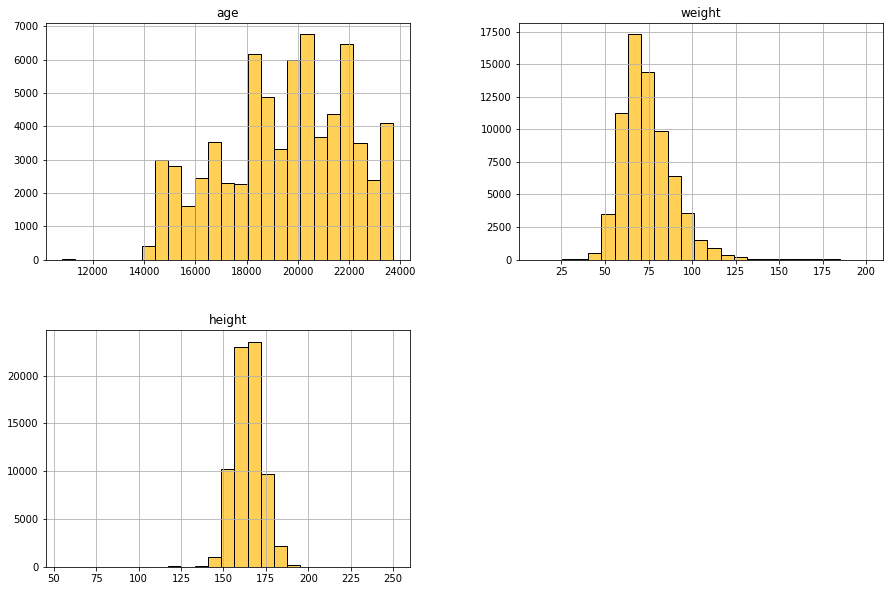

In [6]:
main_data.hist(column=['age','weight','height'],bins=25, figsize=(15, 10), color='#FFCF56', edgecolor='black')

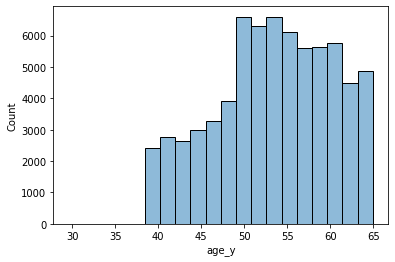

In [7]:
##########  DATA TRANSFORMATION  #######################
# convert age from days to years
main_data['age_y'] = (main_data['age']/365).round(decimals=2)
sns.histplot(data=main_data,x='age_y',bins=20,palette="dark:darkred", alpha=0.5)

To obtain the *number of years* of the patient, the *number of days* - **"age"** was divided by 365 days, which is mean number of days in a year and added as **"age_y"** variable to the dataset. The outcome was reounded to 2 decimals afterward.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1585f8a10>]],
      dtype=object)

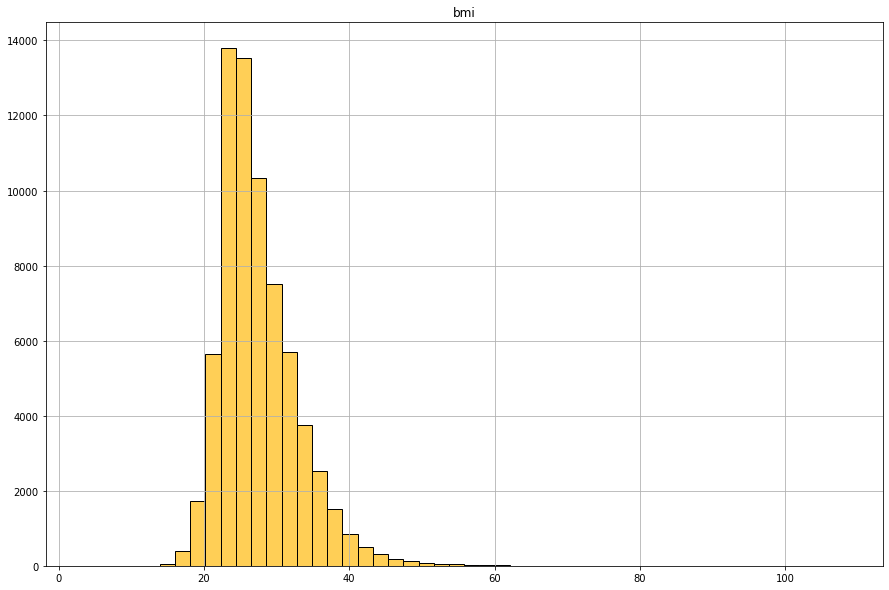

In [30]:
#convert height and weight to BMI categories 
main_data['bmi'] = (main_data['weight'] / (((main_data['height']/100)**2))).round(decimals=2)
#creating the treshold 0 -> 1 of BMI on BMI level =30
main_data['bmi_high'] = (main_data['bmi'] >= 30).astype(int)
main_data.hist(column=['bmi'], bins=50, figsize=(15, 10), color='#FFCF56', edgecolor='black')





In [42]:

main_data['bmi'].describe().T

count    68699.000000
mean        27.467760
std          5.307031
min          3.470000
25%         23.880000
50%         26.350000
75%         30.120000
max        108.170000
Name: bmi, dtype: float64

Two of variables **"weight"** and **" height"** were transformed into the **"bmi"** variable, to standardize the relation of weight on square meter of heigh. It could de done as both of them were distributed normally. Above is the histogram of **"bmi"** variable. It is positevile skewted towards the zero, meaning that the mean is bit differend than the mediana of bmi. Its kurtosis is positive, thus the distribution is leptokurtic, meaning that there is a bigger than normall concentration of an observaitions near the median. 

In [9]:
main_data.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_y,bmi,bmi_high
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.39,21.97,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.42,34.93,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.66,23.51,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.28,28.71,0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.87,23.01,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,60.04,29.38,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,60.58,37.73,1
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,61.87,29.98,0
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0,48.41,28.44,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0,54.34,25.28,0


In [10]:
#display the proportion of patients being obes to those who are not
display(pd.DataFrame(main_data['bmi_high'].value_counts()))

,bmi_high
0,51475
1,18525


Here I displayed the proportion of the patient that will be considered as obese for BMI >= 30 and not obese for patiants that have BMi lower than 30. It seems that 51 475 patients are *"not obese*" and 18 525 are *" obese"*.

In [11]:
#converting gender from 1 and 2 to 0 and 1 value, where 
#   0 = female        and     1 = male

main_data['gender_dummy'] = main_data['gender'] - 1
main_data.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_y,bmi,bmi_high,gender_dummy
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.39,21.97,0,1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.42,34.93,1,0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.66,23.51,0,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.28,28.71,0,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.87,23.01,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,60.04,29.38,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,60.58,37.73,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,61.87,29.98,0,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0,48.41,28.44,0,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0,54.34,25.28,0,0


In [12]:
############## DATA CLEANING ###################
# deleting the BMI that are bigger than 120

main_data["bmi"].describe().T
drop_criteria_bmi = main_data[main_data['bmi'] > 120].index

# number of records to be removed
print(drop_criteria_bmi.size)
# remove records
main_data.drop(drop_criteria_bmi, inplace = True)

27


In [13]:
#adjust the Blood pressure levels 
# ap_hi is higher than 250 or lower than 60
drop_criteria_aphi = main_data[(main_data['ap_hi'] > 210) | (main_data['ap_hi'] < 60)].index

# ap_lo is higher than 200 or lower than 10
drop_criteria_aplo = main_data[(main_data['ap_lo'] > 140) | (main_data['ap_lo'] < 30)].index

# ap_lo is higher than 'ap_hi
drop_criteria_ap = main_data[main_data['ap_lo'] > main_data['ap_hi']].index 

# number of records to be removed
drop_criteria = drop_criteria_aphi.union(drop_criteria_aplo)
drop_criteria.union(drop_criteria_ap)
print(drop_criteria.size)
1276
# remove the records
main_data.drop(drop_criteria, inplace = True)

#blood preasure levels set up acc. to The Seventh Report of the Joint National Committee on Prevention, Detection, Evaluation, and Treatment of High Blood Pressure (2003 Guideline)2
#creating the treshold 0 -> 1 for ap_hi

main_data['ap_hi_norm'] = (main_data['ap_hi'] < 120).astype(int)
main_data['ap_hi_at_risk'] = ((main_data['ap_hi'] >= 120) & (main_data['ap_hi'] <=139)).astype(int)
main_data['ap_hi_hypertension']= (main_data['ap_hi'] >=140).astype(int)

#creating the treshold 0 -> 1 for ap_lo 

main_data['ap_lo_norm'] = (main_data['ap_lo'] < 80).astype(int)
main_data['ap_lo_at_risk'] = ((main_data['ap_lo'] >= 80) & (main_data['ap_lo'] <=89)).astype(int)
main_data['ap_lo_hypertension']= (main_data['ap_lo'] >=90).astype(int)

main_data

1274


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_y,bmi,bmi_high,gender_dummy,ap_hi_norm,ap_hi_at_risk,ap_hi_hypertension,ap_lo_norm,ap_lo_at_risk,ap_lo_hypertension
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.39,21.97,0,1,1,0,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.42,34.93,1,0,0,0,1,0,0,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.66,23.51,0,0,0,1,0,1,0,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.28,28.71,0,1,0,0,1,0,0,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.87,23.01,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52.71,26.93,0,1,0,1,0,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61.92,50.47,1,0,0,0,1,0,0,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52.24,31.35,1,1,0,0,1,0,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61.45,27.10,0,0,0,1,0,0,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa166a30c50>]],
      dtype=object)

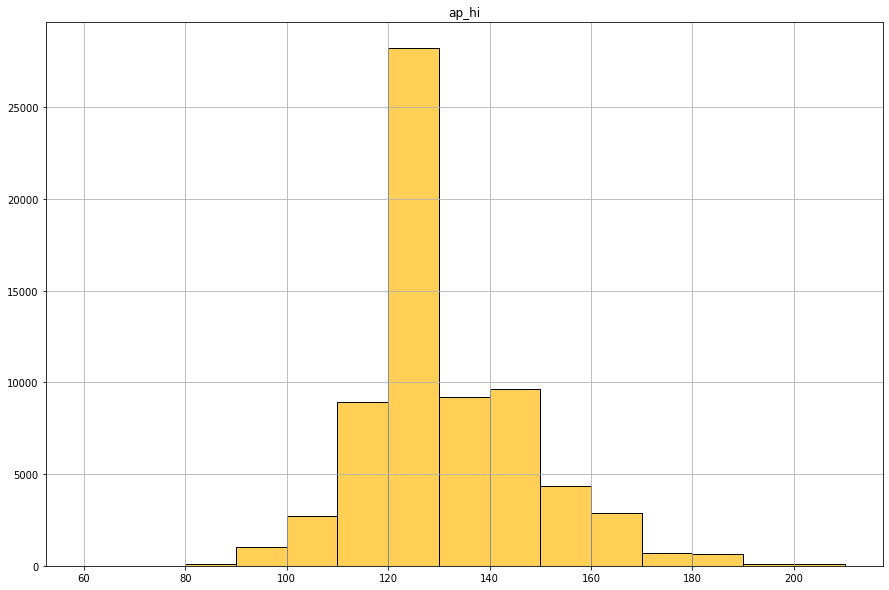

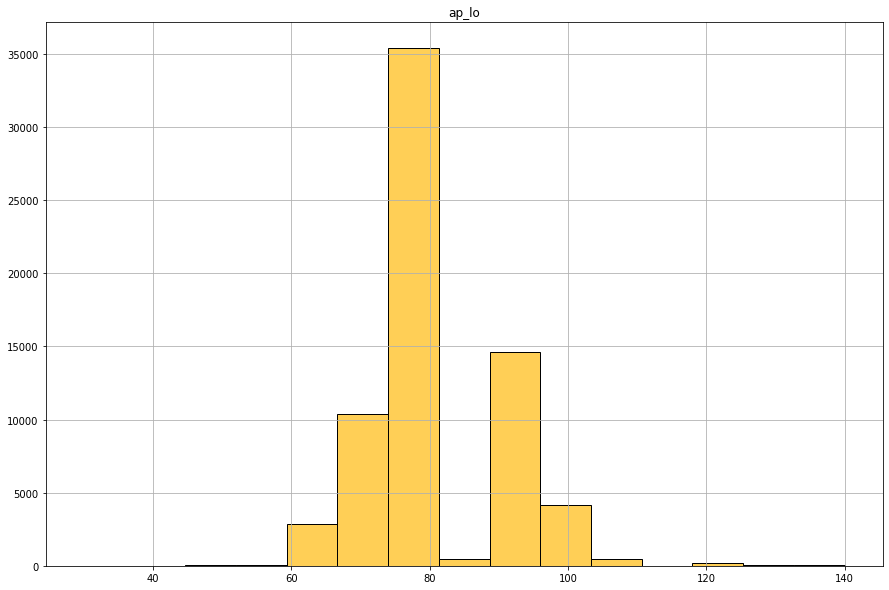

In [14]:
# check of the distribution of Systolic and Diastolic Blood Preasure after data cleaning and transformation of blood preasure levels

main_data.hist(column=['ap_hi'], bins=15, figsize=(15, 10), color='#FFCF56', edgecolor='black')
main_data.hist(column=['ap_lo'], bins=15, figsize=(15, 10), color='#FFCF56', edgecolor='black')

In [15]:
display(main_data.describe().T)

,count,mean,std,min,25%,50%,75%,max
id,68699.0,49969.859940,28846.891902,0.00,24993.50,50008.00,74868.50,99999.00
age,68699.0,19464.045532,2468.186192,10798.00,17657.00,19701.00,21324.00,23713.00
gender,68699.0,1.348695,0.476561,1.00,1.00,1.00,2.00,2.00
height,68699.0,164.393863,7.996745,76.00,159.00,165.00,170.00,250.00
weight,68699.0,74.107002,14.296139,11.00,65.00,72.00,82.00,200.00
ap_hi,68699.0,126.571275,16.619176,60.00,120.00,120.00,140.00,210.00
ap_lo,68699.0,81.327603,9.509558,30.00,80.00,80.00,90.00,140.00
cholesterol,68699.0,1.364445,0.678762,1.00,1.00,1.00,1.00,3.00
gluc,68699.0,1.225840,0.571799,1.00,1.00,1.00,1.00,3.00
smoke,68699.0,0.088022,0.283328,0.00,0.00,0.00,0.00,1.00


In [16]:
# distribution of response variable
display(pd.DataFrame(main_data['cardio'].value_counts()))

,cardio
0,34716
1,33983


########################   DATA VISUALISATION  ###################################
# Here is a visualisation of both of the categorical and and continous variables from the cleaned dataset. 

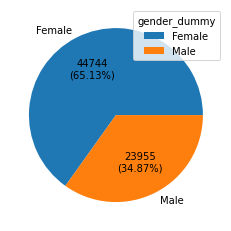

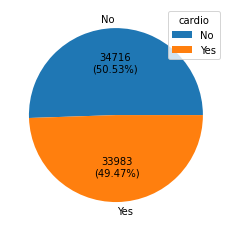

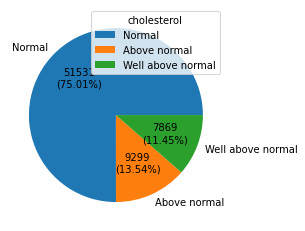

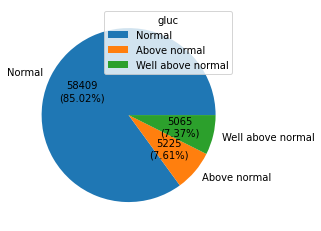

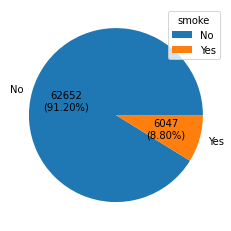

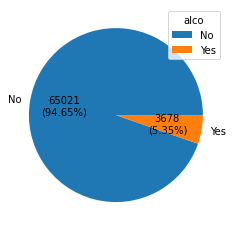

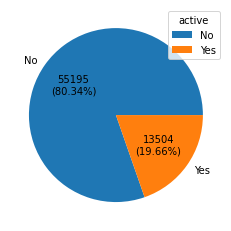

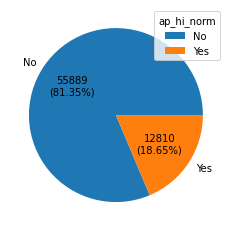

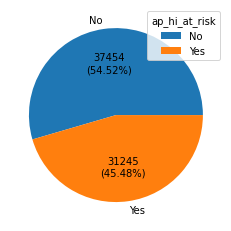

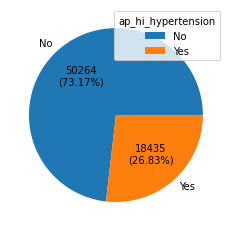

In [17]:
def pie_chart(main_data, col, labels):
    data = main_data[col].value_counts().to_numpy()
    def absolute_value(val):
        a  = np.round(val / 100 * data.sum(), 0)
        return str('%0.0f' % a) + '\n(' + ('%0.2f' % val) + '%)'
    plt.pie(data, labels = labels, autopct=absolute_value)
    plt.legend(title=col)
    plt.show() 

pie_chart(main_data, 'gender_dummy', ['Female', 'Male'])
pie_chart(main_data, 'cardio', ['No', 'Yes'])
pie_chart(main_data, 'cholesterol', ['Normal', 'Above normal', 'Well above normal'])
pie_chart(main_data, 'gluc', ['Normal', 'Above normal', 'Well above normal'])
pie_chart(main_data, 'smoke', ['No', 'Yes'])
pie_chart(main_data, 'alco', ['No', 'Yes'])
pie_chart(main_data, 'active', ['No', 'Yes'])
#ap_hi levels - dichotomous variable
pie_chart(main_data, 'ap_hi_norm', ['No', 'Yes'])
pie_chart(main_data, 'ap_hi_at_risk', ['No', 'Yes'])
pie_chart(main_data, 'ap_hi_hypertension', ['No', 'Yes'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1632c7750>,
      dtype=object)

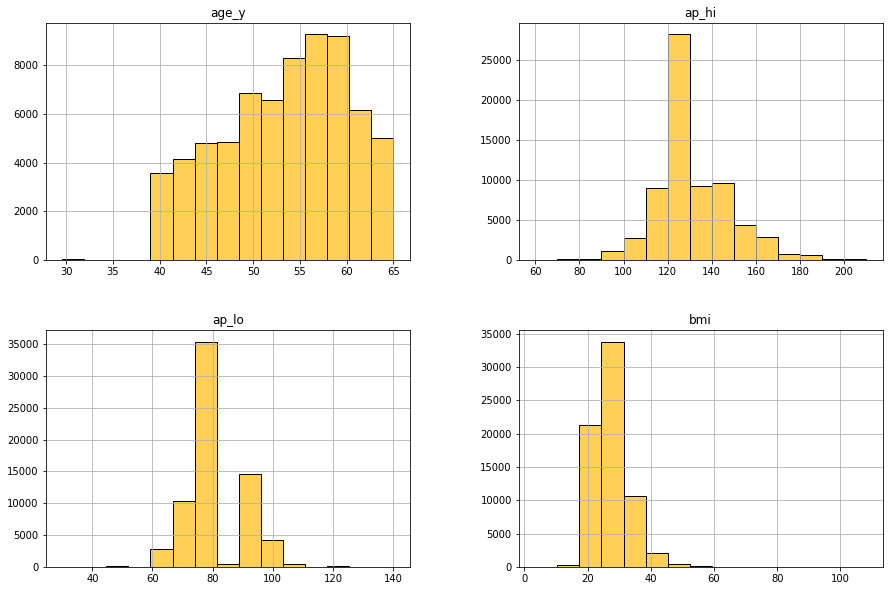

In [18]:
# Plot the Contionus Variables 

main_data.hist(column=['age_y','ap_hi','ap_lo','bmi'], bins=15, figsize=(15, 10), color='#FFCF56', edgecolor='black')


<Figure size 7200x9360 with 0 Axes>

<Figure size 7200x9360 with 0 Axes>

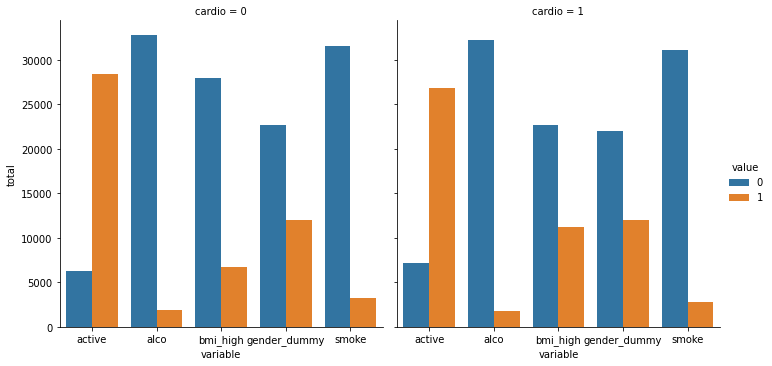

In [19]:
# Draw Categorical Plot of Dichotomus Variables
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` 
    #using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', ;gender_dummy' and 'bmi_high'.
    data_cat = pd.melt(main_data,value_vars = [ 'smoke', 'alco', 'active', 'gender_dummy','bmi_high'],
                       id_vars=['cardio'])

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature.
    #You will have to rename one of the columns for the catplot to work correctly.
    data_cat = pd.DataFrame(data_cat.groupby(['variable', 'value', 'cardio'])['value']
                          .count()).rename(columns={'value': 'total'}).reset_index()    

    # Draw the catplot with 'sns.catplot()'
    fig = plt.figure(figsize=(100,130))
    sns.catplot(data = data_cat, x='variable', y='total', hue='value', col='cardio', kind="bar")

    # saving the png image
    fig.savefig('catplot1.png')
    return fig

draw_cat_plot()

<Figure size 1440x3600 with 0 Axes>

<Figure size 1440x3600 with 0 Axes>

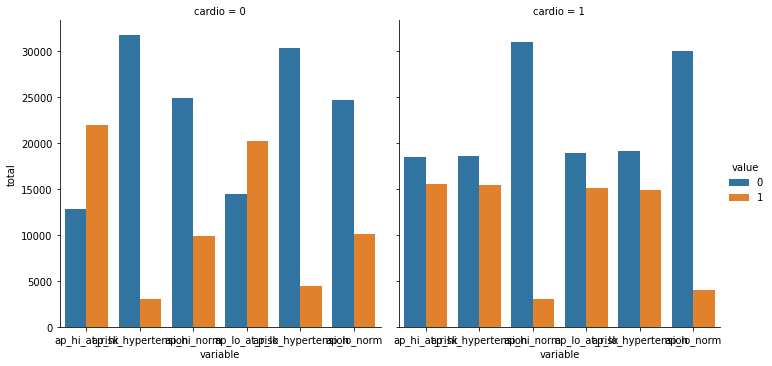

In [20]:
# Draw Categorical Plot of Dichotomus Variables
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` 
    #using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', ;gender_dummy' and 'bmi_high'.
    data_cat = pd.melt(main_data,value_vars = [ 'ap_hi_norm','ap_hi_at_risk','ap_hi_hypertension','ap_lo_norm','ap_lo_at_risk','ap_lo_hypertension' ],
                       id_vars=['cardio'])

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature.
    #You will have to rename one of the columns for the catplot to work correctly.
    data_cat = pd.DataFrame(data_cat.groupby(['variable', 'value', 'cardio'])['value']
                          .count()).rename(columns={'value': 'total'}).reset_index()    

    # Draw the catplot with 'sns.catplot()'
    fig = plt.figure(figsize=(20,50))
    sns.catplot(data = data_cat, x='variable', y='total', hue='value', col='cardio', kind="bar")

    # saving the png image
    fig.savefig('catplot2.png')
    return fig

draw_cat_plot()

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

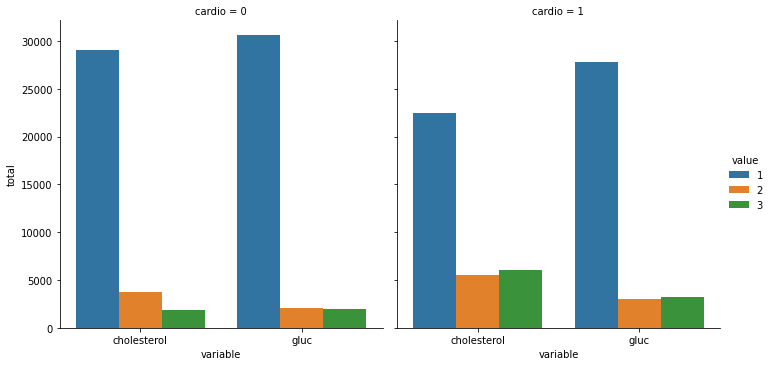

In [21]:
# Draw the plot of Categorical variables
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` 
    #using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', ;gender_dummy' and 'bmi_high'.
    data_cat = pd.melt(main_data,value_vars = ['cholesterol', 'gluc'],
                       id_vars=['cardio'])

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature.
    #You will have to rename one of the columns for the catplot to work correctly.
    data_cat = pd.DataFrame(data_cat.groupby(['variable', 'value', 'cardio'])['value']
                          .count()).rename(columns={'value': 'total'}).reset_index()    

    # Draw the catplot with 'sns.catplot()'
    fig = plt.figure(figsize=(20,30))
    sns.catplot(data = data_cat, x='variable', y='total', hue='value', col='cardio', kind="bar")

    # saving the png image
    fig.savefig('catplot3.png')
    return fig

draw_cat_plot()

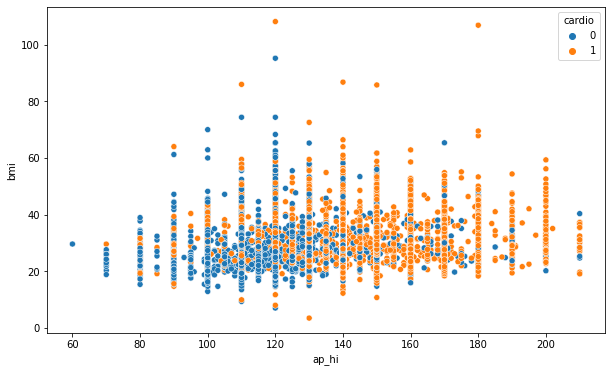

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ap_hi', y='bmi', data= main_data, hue='cardio')

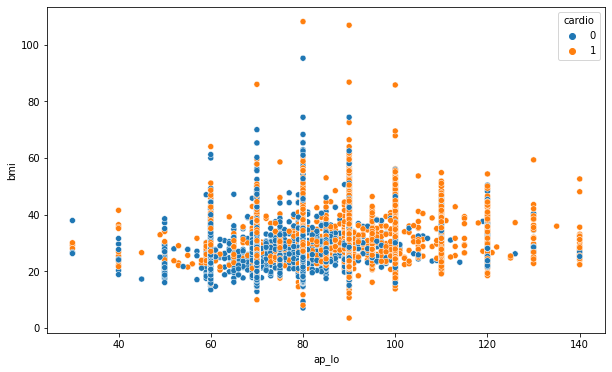

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ap_lo', y='bmi', data= main_data, hue='cardio')


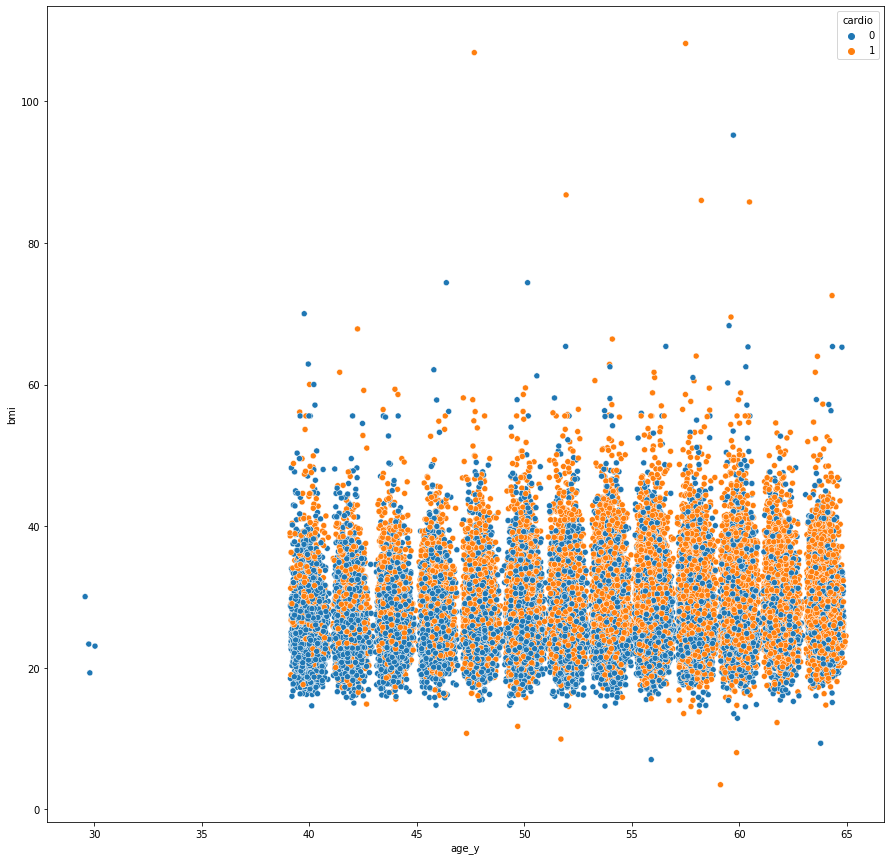

In [28]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x='age_y', y='bmi', data= main_data, hue='cardio', legend = "full")



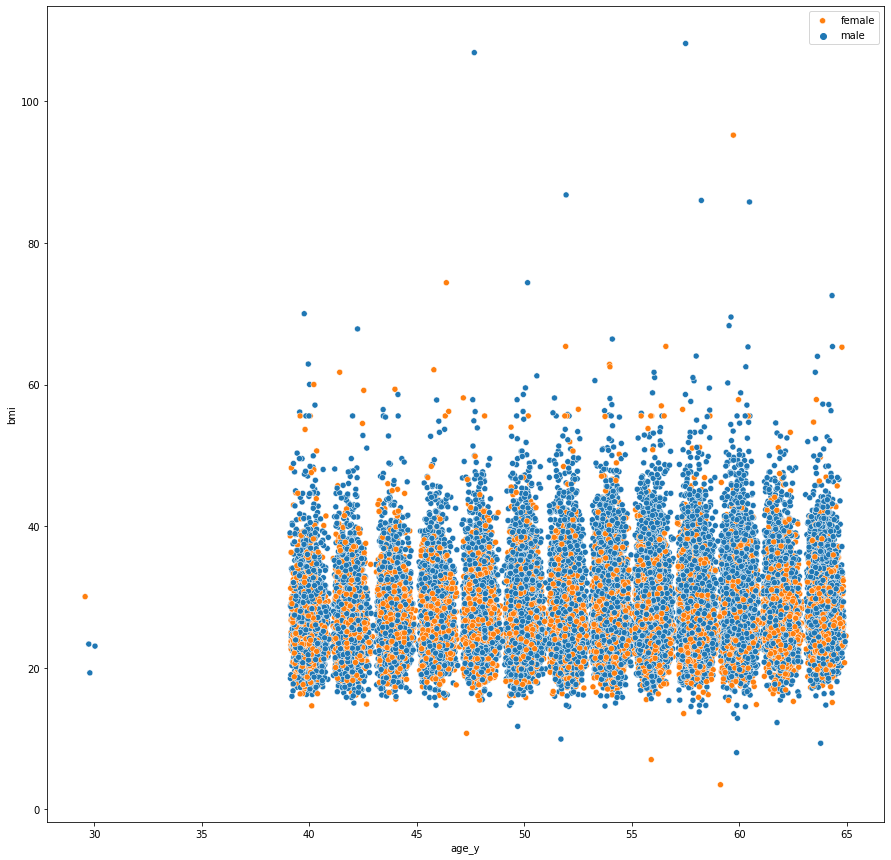

In [25]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x='age_y', y='bmi', data= main_data, hue='gender_dummy')
plt.legend(["female" , "male"])

In [26]:
#correlation matrix 
# correlation heatmap
corr = main_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_y,bmi,bmi_high,gender_dummy,ap_hi_norm,ap_hi_at_risk,ap_hi_hypertension,ap_lo_norm,ap_lo_at_risk,ap_lo_hypertension
id,1.000000,0.003754,0.002887,-0.003226,-0.002019,0.000820,-0.001031,0.005848,0.002127,-0.003255,0.000603,0.003812,0.003756,0.003754,-0.000891,0.002453,0.002887,-0.006399,0.004267,0.000830,0.000224,0.000152,-0.000370
age,0.003754,1.000000,-0.023251,-0.084251,0.054807,0.209126,0.153888,0.155335,0.099040,-0.047832,-0.028973,-0.010430,0.239389,1.000000,0.100693,0.081718,-0.023251,-0.186019,0.011055,0.151087,-0.144617,0.006293,0.122571
gender,0.002887,-0.023251,1.000000,0.510902,0.156759,0.060779,0.067829,-0.036598,-0.020994,0.338885,0.171446,0.005671,0.007166,-0.023252,-0.108707,-0.110239,1.000000,-0.078171,0.035085,0.029284,-0.066091,0.018597,0.038549
height,-0.003226,-0.084251,0.510902,1.000000,0.304153,0.018771,0.037124,-0.052754,-0.020224,0.193199,0.097744,-0.009336,-0.011813,-0.084251,-0.223091,-0.186768,0.510902,-0.079000,0.076475,-0.016502,-0.065255,0.056818,-0.004667
weight,-0.002019,0.054807,0.156759,0.304153,1.000000,0.269348,0.250431,0.140791,0.106980,0.066751,0.067898,-0.017739,0.179895,0.054804,0.852274,0.676248,0.156759,-0.183341,-0.043393,0.209921,-0.174650,-0.050323,0.212381
ap_hi,0.000820,0.209126,0.060779,0.018771,0.269348,1.000000,0.706227,0.193433,0.092730,0.027565,0.033127,-0.000997,0.427660,0.209124,0.262307,0.217475,0.060779,-0.587193,-0.262910,0.811600,-0.445727,-0.211561,0.634389
ap_lo,-0.001031,0.153888,0.067829,0.037124,0.250431,0.706227,1.000000,0.159280,0.075262,0.026003,0.040753,0.000112,0.337568,0.153886,0.233918,0.190526,0.067829,-0.500231,-0.120390,0.574996,-0.699860,-0.133316,0.775131
cholesterol,0.005848,0.155335,-0.036598,-0.052754,0.140791,0.193433,0.159280,1.000000,0.450990,0.010082,0.035495,0.008929,0.221461,0.155337,0.168029,0.154617,-0.036598,-0.089945,-0.093969,0.184664,-0.086674,-0.081702,0.168429
gluc,0.002127,0.099040,-0.020994,-0.020224,0.106980,0.092730,0.075262,0.450990,1.000000,-0.005630,0.010784,-0.007703,0.089933,0.099041,0.117532,0.107219,-0.020994,-0.053859,-0.029786,0.080815,-0.046797,-0.024881,0.069570
smoke,-0.003255,-0.047832,0.338885,0.193199,0.066751,0.027565,0.026003,0.010082,-0.005630,1.000000,0.340355,0.025293,-0.016363,-0.047832,-0.033908,-0.029479,0.338885,-0.010626,-0.010190,0.020792,-0.010822,-0.014764,0.026099


############# FORMULATION OF HYPOTHESIS ###########################

Modelling techniques used:

 
The models that are tobe employed for the furhter analysis would be the models that can predict binary dependent models like:
 
1.   **Logistic regression model * - typical method used when the dependent variable is binary.
2.   **Artificial Neural Network - MLPClassifier** - Artificial Neural Networks are particularly suited to solve type of linearly inseparable classification problems.
The division between the different classes are determined in an iterative process. The trained neural network can be evaluated using a test set of the data. The validation results will be saved in the validation_results dictionary with the keys: Average accuracy, a Kappa for each predicted class, an average kappa and a rapport including precision, recall, f1-score and support.
3. **Decision Tree ** - The representation for the CART model is a binary tree.

This is your binary tree from algorithms and data structures, nothing too fancy. Each root node represents a single input variable (x) and a split point on that variable (assuming the variable is numeric).

The leaf nodes of the tree contain an output variable (y) which is used to make a prediction.

Given a dataset with two inputs (x) of height in centimeters and weight in kilograms the output of sex as male or female, below is a crude example of a binary decision tree (completely fictitious for demonstration purposes only).
4. **Cluster Analysis**